<a href="https://colab.research.google.com/github/dolmani38/BLE-signal-collision-simulation/blob/main/simulation_0625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BLE Signal collision simulation

* 2 signal의 충돌 확률을 고려한다.
* Signal은 5000ms 간격, 2ms 동안 송출
* 2ms 내 3개 channel로 각 1회 총 3회 순차적 송출
* 이에 따른 2 signal의 충돌 확률은 2/5000 * (1/1.4)^3 으로 생각 가능
* 여기서 1/1.4는 동일 channel이 충돌할 확률
* 2 signal의 충돌 확률을 a 라고 한다면 

* 3 signal의 충돌은 1,2번 충돌, 1,3번 충돌, 2,3번 충돌, 1,2,3 모두 충돌의 경우의 수를 고려 가능
* 이상의 경우, 3a + a^2 으로 표현 가능
* 여기서 a^2은, 1,2번이 충돌과 여기에 3번이 동시에 충돌될 확률에 해당
* 4 Signal의 경우 같은 맥락으로 6a + 2a^2 + a^3 으로 표현 가능

* 수식 입력 참고 (https://colab.research.google.com/github/datascienceschool/book/blob/master/ds/02%20mathematics/04.01%20%ED%95%A8%EC%88%98.ipynb)

## n Signal collision function

2 Signal collision probability

* signal_period = sp
* signal_duration = sd
* channel_variation = cv
* channel_count = cc

$$
\begin{align}
P_c = \dfrac{sd}{sp} (\dfrac{1}{cv})^{cc}
\tag{1}
\end{align}
$$


n Signal collision fuction

$$
\begin{align}
P_c(n) = \sum_{k=2}^n (k-1)P_c + \sum_{m=2}^n (n-m)P_c^{m}
\tag{2}
\end{align}
$$

In [28]:
# 2 Signal collision probability

signal_period = 5000
signal_duration = 2
channel_variation = 1.4
channel_count = 3

Pc = (signal_duration / signal_period) * (1/channel_variation) ** channel_count

Pc

0.00014577259475218661

In [29]:
from typing import MappingView
def collision_fuction(signal_count=100, default_prob = Pc):
    term1 = 0.0
    term2 = 0.0
    for k in range(2,signal_count+1):
        term1 = term1 + (k-1)*default_prob

    for m in range(2,signal_count+1):
        term2 = term2 + (signal_count - m)*default_prob**m

    return term1 + term2


In [40]:
import matplotlib.pyplot as plt

def collision_simulation(signal_count=100, default_prob = Pc):
    collision = []
    collision.append(0.0)
    collision.append(0.0)
    for i in range(2,signal_count):
        collision.append(collision_fuction(signal_count=i))

    print(f"{signal_count}개 운영의 경우, {collision[-1]:.4f}개의 충돌 예측.")
    plt.plot(collision)

100개 운영의 경우, 0.7071개의 충돌 예측.


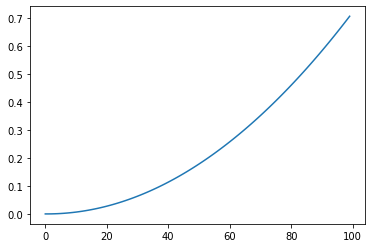

In [41]:

collision_simulation(signal_count=100)


500개 운영의 경우, 18.1124개의 충돌 예측.


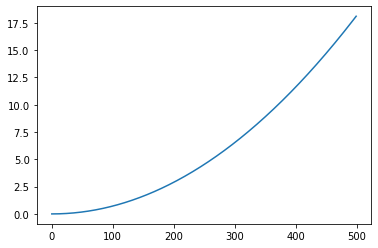

In [42]:

collision_simulation(signal_count=500)

1000개 운영의 경우, 72.6678개의 충돌 예측.


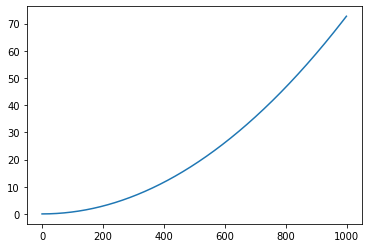

In [43]:
collision_simulation(signal_count=1000)

10000개 운영의 경우, 7286.4435개의 충돌 예측.


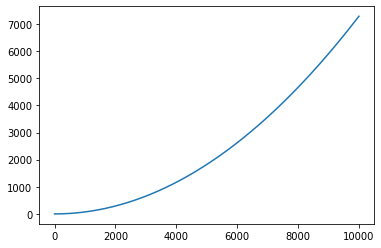

In [44]:
collision_simulation(signal_count=10000)